<a href="https://colab.research.google.com/github/ylm19/Data_analysis_practice_Limmy/blob/main/002_Brazilian_E_Commerce_Public_Dataset_by_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I. Background

This is a Brazilian ecommerce public dataset of orders made at Olist Store from Kaggel. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. 

This report use Python and tableau to analyze the data set, explore the sales situation and product distribution of the platform, and subdivide customers and refine sales.


## II. Dataset Description


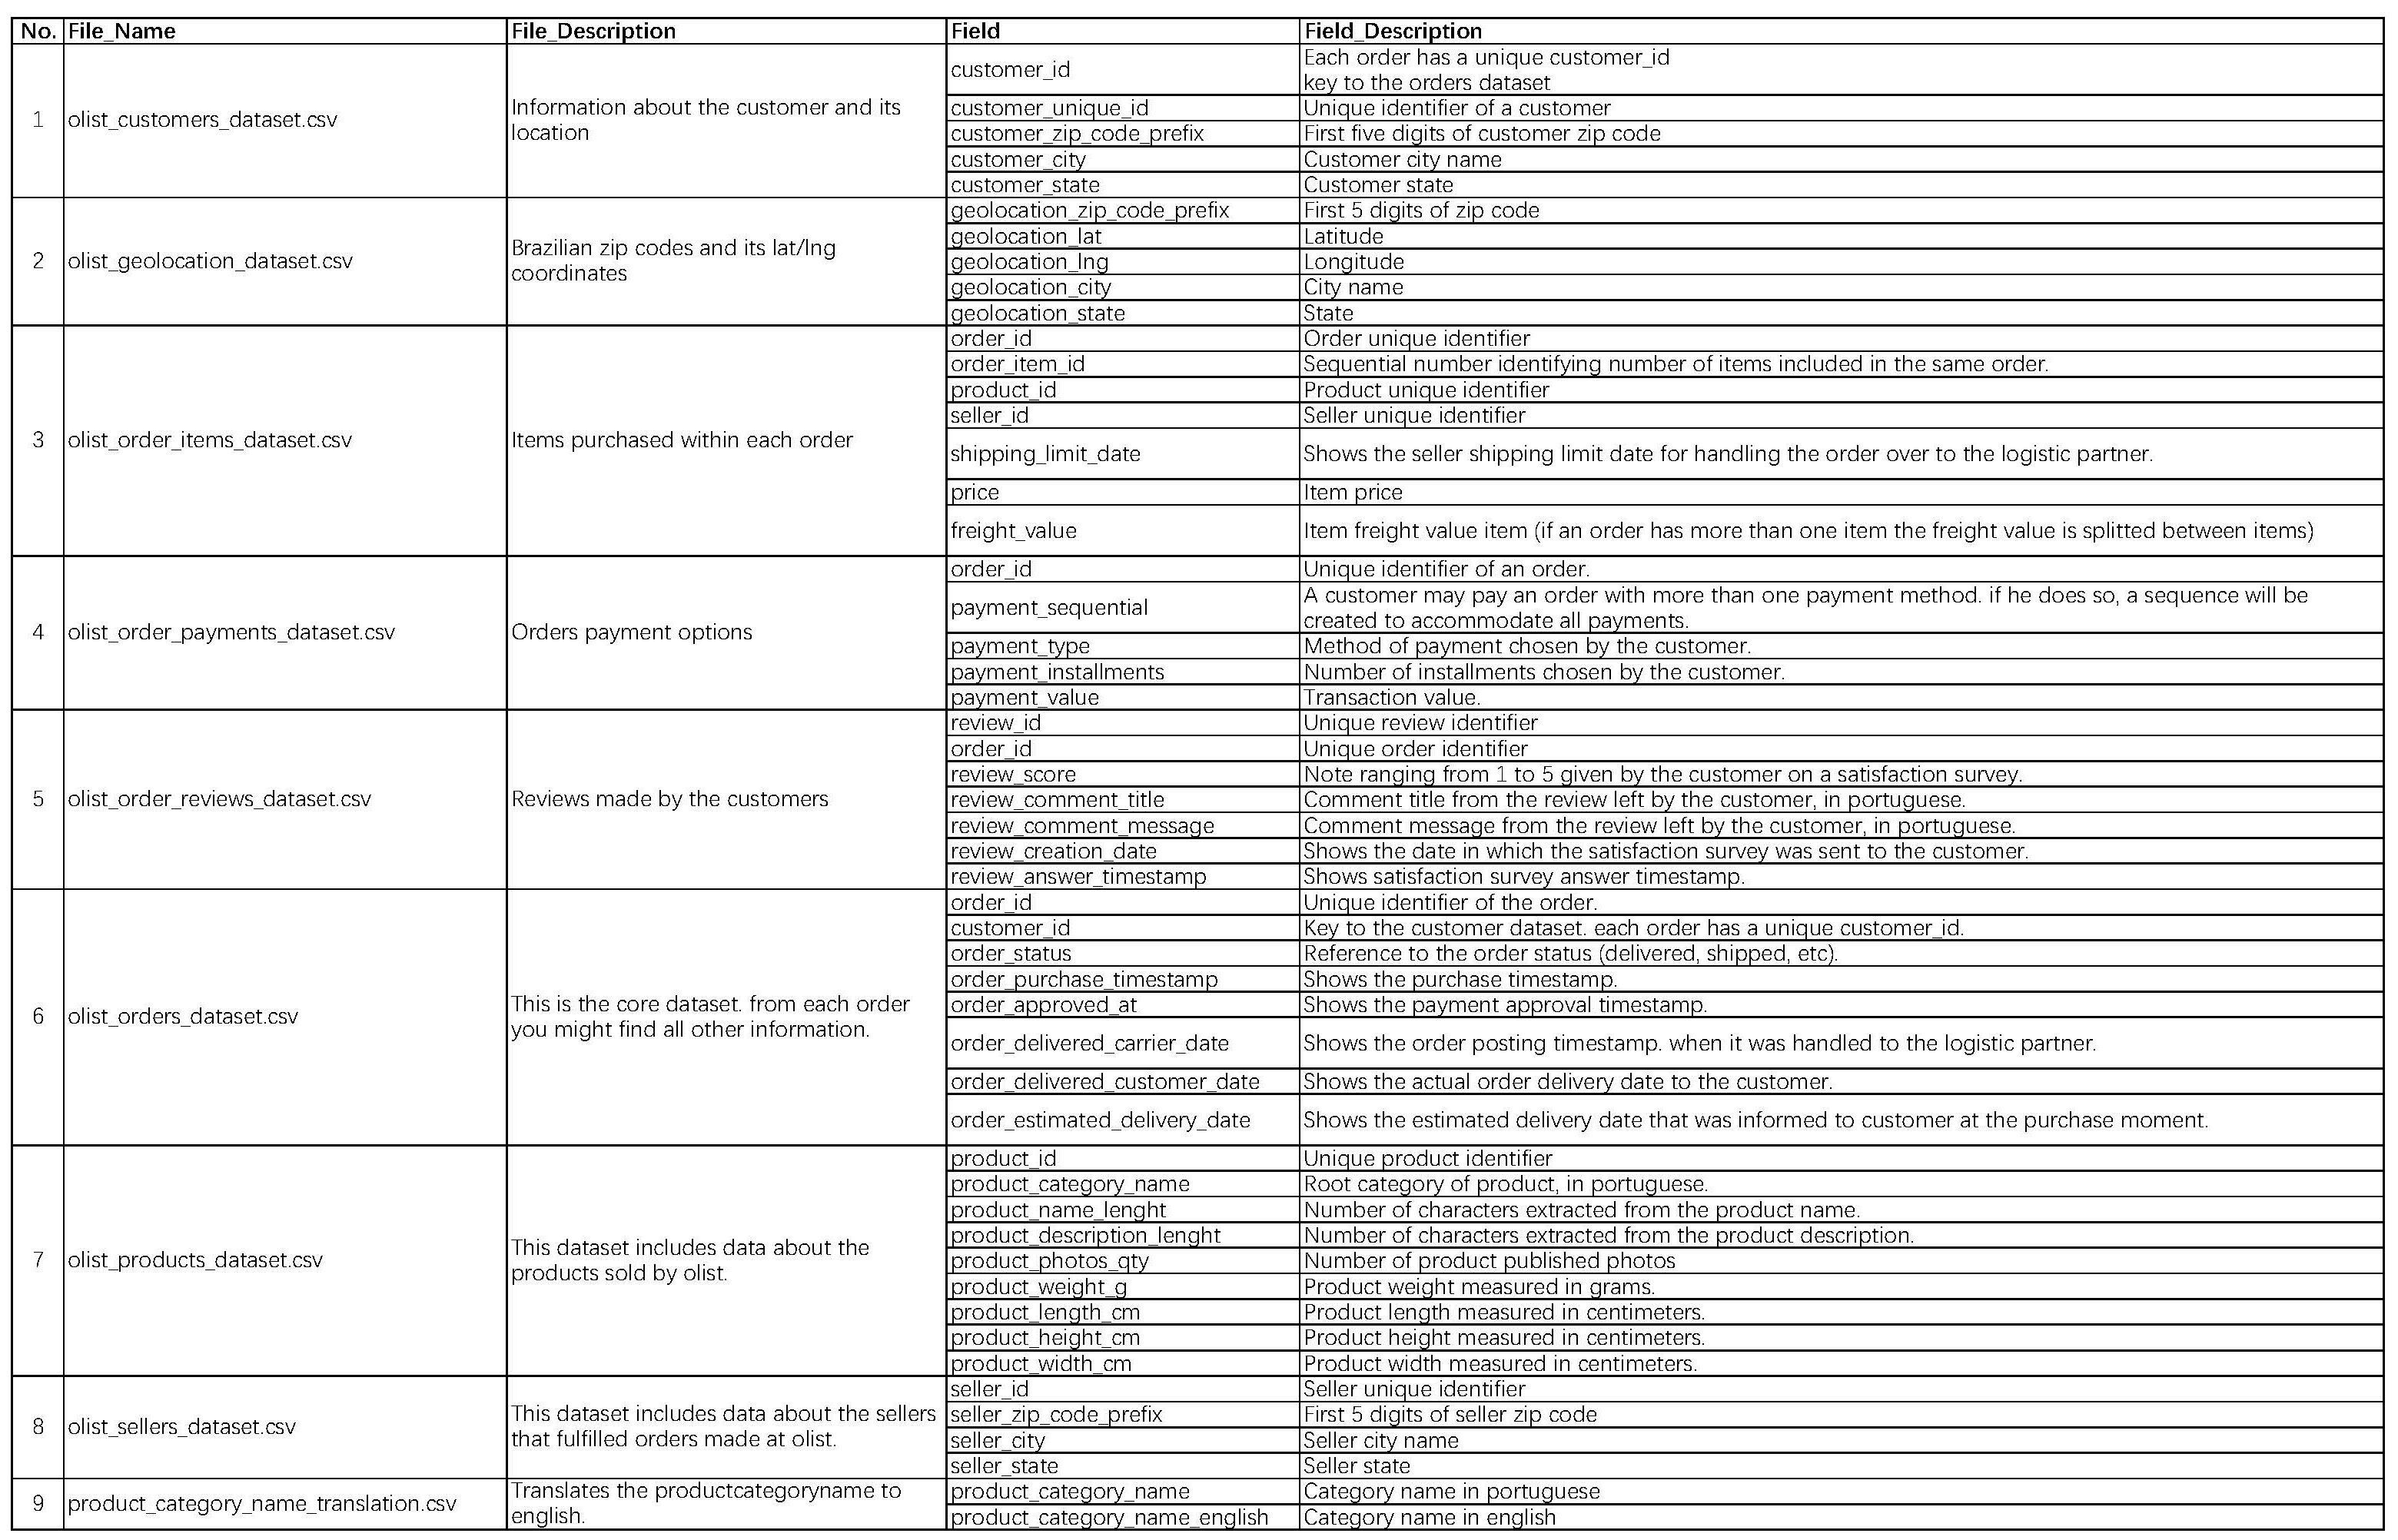

## III. Analytical Framework

According to the above datasets, this analysis is conducted from the perspectives of People, Goods and Site.

The analysis framework is as follows:

## IV. Data Processing
### 1. Import related libraries

In [ ]:
# Import related libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Adjust the number of rows and columns displayed
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

### 2. Input Datasets

In [ ]:
orders = pd.read_csv('/content/olist_orders_dataset.csv')
payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
customers = pd.read_csv('/content/olist_customers_dataset.csv')
reviewss = pd.read_csv('/content/olist_order_reviews_dataset.csv')
order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
pro_trans = pd.read_csv('/content/product_category_name_translation.csv')

### 3. Merge Datasets

In [ ]:
order_payment = pd.merge(orders, payments, on='order_id', how='left')
payorder_customer = pd.merge(order_payment, customers, on='customer_id', how='left')
basic_data = pd.merge(payorder_customer, order_items, on='order_id', how='left')

basic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   payment_sequential             118431 non-null  float64
 9   payment_type                   118431 non-null  object 
 10  payment_installments           118431 non-null  float64
 11  payment_value                  118431 non-null  float64
 12  customer_unique_id            

### 4. Data Cleaning

In [ ]:
basic_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


#### (1) Missing Values Processing

In [ ]:
# Count the number and proportion of missing values
def missing_value(data, num):
    null_data = basic_data.isnull().sum().sort_values(ascending=False)
    percent_1 = basic_data.isnull().sum()/data.isnull().count()
    missing_data = pd.concat([null_data, percent_1.apply(lambda x: format(x, '.2%'))],
                             axis=1, keys=['total missing', 'missing percentage'])
    print(missing_data.head(num))

missing_value(basic_data, 15)

                               total missing missing percentage
order_delivered_customer_date           3397              2.87%
order_delivered_carrier_date            2074              1.75%
freight_value                            830              0.70%
price                                    830              0.70%
shipping_limit_date                      830              0.70%
seller_id                                830              0.70%
product_id                               830              0.70%
order_item_id                            830              0.70%
order_approved_at                        176              0.15%
payment_installments                       3              0.00%
payment_value                              3              0.00%
payment_type                               3              0.00%
payment_sequential                         3              0.00%
customer_id                                0              0.00%
customer_unique_id                      

In [ ]:
# Count the number and proportion of missing values
null_data = basic_data.isnull().sum().sort_values(ascending=False)
null_percent = basic_data.isnull().sum()/basic_data.isnull().count()
missing_data = pd.concat([null_data,null_percent.apply(lambda x: format(x, '.2%'))],axis=1,keys=['total missing', 'missing percentage'])
missing_data

,total missing,missing percentage
order_delivered_customer_date,3397,2.87%
order_delivered_carrier_date,2074,1.75%
freight_value,830,0.70%
price,830,0.70%
shipping_limit_date,830,0.70%
seller_id,830,0.70%
product_id,830,0.70%
order_item_id,830,0.70%
order_approved_at,176,0.15%
payment_installments,3,0.00%


In [ ]:
# Delete missing values
basic_data = basic_data.dropna()
basic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115018 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115018 non-null  object 
 1   customer_id                    115018 non-null  object 
 2   order_status                   115018 non-null  object 
 3   order_purchase_timestamp       115018 non-null  object 
 4   order_approved_at              115018 non-null  object 
 5   order_delivered_carrier_date   115018 non-null  object 
 6   order_delivered_customer_date  115018 non-null  object 
 7   order_estimated_delivery_date  115018 non-null  object 
 8   payment_sequential             115018 non-null  float64
 9   payment_type                   115018 non-null  object 
 10  payment_installments           115018 non-null  float64
 11  payment_value                  115018 non-null  float64
 12  customer_unique_id            

#### (2) Outliers Processing

In [ ]:
basic_data.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value
count,115018.000000,115018.000000,115018.000000,115018.000000,115018.000000,115018.000000,115018.000000
mean,1.090699,2.936958,171.915654,35081.609113,1.196404,120.080129,19.995686
std,0.684409,2.772466,266.125730,29851.527722,0.699409,183.038922,15.744372
min,1.000000,0.000000,0.000000,1003.000000,1.000000,0.850000,0.000000
25%,1.000000,1.000000,60.850000,11310.000000,1.000000,39.900000,13.080000
50%,1.000000,2.000000,108.190000,24320.000000,1.000000,74.900000,16.280000
75%,1.000000,4.000000,188.940000,58801.750000,1.000000,133.000000,21.180000
max,26.000000,24.000000,13664.080000,99980.000000,21.000000,6735.000000,409.680000


*   payment_installations: The minimum value should be 1, which means no installation, or 3,6,12,etc. The above display shows that 0 is an abnormal value;
*   payment_value: Generally, the payment amount cannot be 0, but the customer may have used a voucher. Check the data later to confirm whether it is abnormal.



In [ ]:
basic_data[basic_data['payment_installments']==0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
75796,744bade1fcf9ff3f31d860ace076d422,5e5794daaa13f73e2f1cdb4114529843,delivered,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-24 03:14:34,2018-04-27 20:55:28,2018-05-16 00:00:00,2.0,credit_card,0.0,58.69,f54cea27c80dc09bfe07b1cf1e01b845,5263,sao paulo,SP,1.0,0cf573090c66bb30ac5e53c82bdb0403,7202e2ba20579a9bd1acb29e61fe71f6,2018-04-26 12:31:06,45.90,12.79
78915,1a57108394169c0b47d8f876acc9ba2d,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,2018-06-06 00:00:00,2.0,credit_card,0.0,129.94,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,1.0,db35a562fb6ba63e19fa42a15349dc04,282f23a9769b2690c5dda22e316f9941,2018-05-18 16:31:54,41.69,23.28
78916,1a57108394169c0b47d8f876acc9ba2d,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,2018-06-06 00:00:00,2.0,credit_card,0.0,129.94,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,2.0,db35a562fb6ba63e19fa42a15349dc04,282f23a9769b2690c5dda22e316f9941,2018-05-18 16:31:54,41.69,23.28


It can be seen that the payment of above three datas' payment amount weren't 0, and both use credit_ Card debit card, so these 3 data with installments of 0 are abnormal values and can be deleted.

In [ ]:
basic_data[basic_data['payment_value']==0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
503,45ed6e85398a87c253db47c2d9f48216,8eab8f9b3c744b76b65f7a2c0c8f2d6c,delivered,2017-06-08 21:18:45,2017-06-08 21:30:18,2017-06-09 08:35:18,2017-06-22 17:44:53,2017-07-10 00:00:00,3.0,voucher,1.0,0.0,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,1.0,75d6b6963340c6063f7f4cfcccfe6a30,cc419e0650a3c5ba77189a1882b7556a,2017-06-15 21:30:18,56.99,14.15
38539,6ccb433e00daae1283ccc956189c82ae,843b211abe7b0264dd4a69eafc5bdf43,delivered,2017-10-26 23:51:35,2017-10-27 00:46:58,2017-10-27 19:53:03,2017-11-08 18:47:00,2017-11-22 00:00:00,4.0,voucher,1.0,0.0,677ad9cdca6c47c733f0cc6e23d7bb4c,25625,petropolis,RJ,1.0,2ee4be9805f228255a38a6f9b03fff1a,da20530872245d6cd9d2f5725613c430,2017-11-03 00:46:58,94.00,28.04
102033,b23878b3e8eb4d25a158f57d96331b18,648121b599d98c420ef93f6135f8c80c,delivered,2017-05-27 19:20:24,2017-05-27 19:35:17,2017-05-29 04:49:37,2017-06-07 08:53:10,2017-06-29 00:00:00,4.0,voucher,1.0,0.0,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,ES,1.0,e306ca54c91b21392317d5b4632c9fe3,e49c26c3edfa46d227d5121a6b6e4d37,2017-06-01 19:35:17,135.30,36.27
115449,8bcbe01d44d147f901cd3192671144db,f2def7f64f36952f2f5a9791f0285f34,delivered,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-01-30 22:43:30,2018-02-02 21:26:42,2018-02-21 00:00:00,4.0,voucher,1.0,0.0,cc5aa1b8337e394da54980226bb0f6d4,21040,rio de janeiro,RJ,1.0,85d4c1a46f08f730de651ea6f6645313,3d871de0142ce09b7081e2b9d1733cb1,2018-01-30 23:37:20,59.00,15.16


The payment amount of the above four data items were 0, which were caused by using vouchers for payment. They are not an abnormal value, so they does not need to be processed.

In [ ]:
# Delete outliers
basic_data = basic_data.drop(index=basic_data[basic_data['payment_installments']==0].index)
basic_data.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value
count,115015.000000,115015.000000,115015.000000,115015.000000,115015.000000,115015.000000,115015.000000
mean,1.090675,2.937034,171.917368,35081.713272,1.196400,120.082137,19.995692
std,0.684403,2.772461,266.128934,29851.764382,0.699414,183.040887,15.744557
min,1.000000,1.000000,0.000000,1003.000000,1.000000,0.850000,0.000000
25%,1.000000,1.000000,60.850000,11310.000000,1.000000,39.900000,13.080000
50%,1.000000,2.000000,108.190000,24320.000000,1.000000,74.900000,16.280000
75%,1.000000,4.000000,188.940000,58803.000000,1.000000,133.000000,21.180000
max,26.000000,24.000000,13664.080000,99980.000000,21.000000,6735.000000,409.680000


#### (3) Duplicate Values Processing

In [ ]:
basic_data.duplicated().sum()

0

There are no duplicate values and no processing is required.

#### (4) DataType Conversion

In [ ]:
# Convert object to datetime
def trans_datetime(data,colum_list):
  for i in colum_list:
    data[i] = pd.to_datetime(data[i])

colum_list = ['order_purchase_timestamp', 'order_approved_at',
              'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']
trans_datetime(basic_data,colum_list) 

In [ ]:
basic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115015 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115015 non-null  object        
 1   customer_id                    115015 non-null  object        
 2   order_status                   115015 non-null  object        
 3   order_purchase_timestamp       115015 non-null  datetime64[ns]
 4   order_approved_at              115015 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115015 non-null  datetime64[ns]
 6   order_delivered_customer_date  115015 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115015 non-null  datetime64[ns]
 8   payment_sequential             115015 non-null  float64       
 9   payment_type                   115015 non-null  object        
 10  payment_installments           115015 non-null  float64       
 11  

In [ ]:
basic_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


After data cleaning operations (such as missing value processing, outlier processing and data type conversion), the dataset finally contains 22 columns and 11505 rows of data. Next, use tableau to visual data analysis.

In [ ]:
basic_data.to_csv('basic_data.csv')